# Statistical Analysis and Probability Distributions with the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
mean_sepal_length = df['sepal length (cm)'].mean()
median_sepal_length = df['sepal length (cm)'].median()
mode_sepal_length = df['sepal length (cm)'].mode()[0]

print(f"Mean: {mean_sepal_length}")
print(f"Median: {median_sepal_length}")
print(f"Mode: {mode_sepal_length}")

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


In [3]:
variance_petal_width = df['petal width (cm)'].var()
std_petal_width = df['petal width (cm)'].std()

print(f"Variance: {variance_petal_width}")
print(f"Standard Deviation: {std_petal_width}")

Variance: 0.5810062639821029
Standard Deviation: 0.7622376689603465


In [4]:
summary_table = df.describe().loc[['mean', '50%', 'std']].rename(index={'50%':'median'})
summary_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758000,1.199333
median,5.800000,3.000000,4.350000,1.300000
std,0.828066,0.435866,1.765298,0.762238


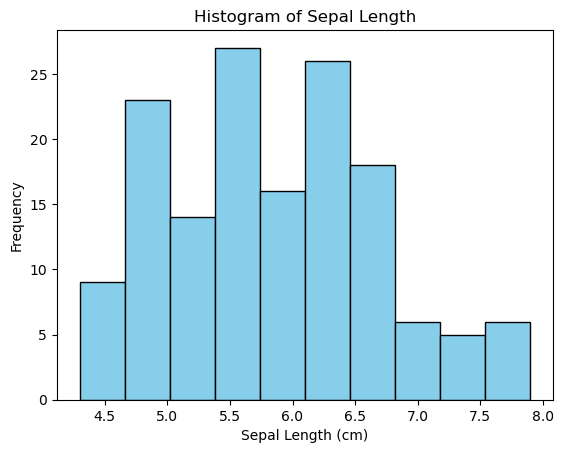

In [5]:
plt.hist(df['sepal length (cm)'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

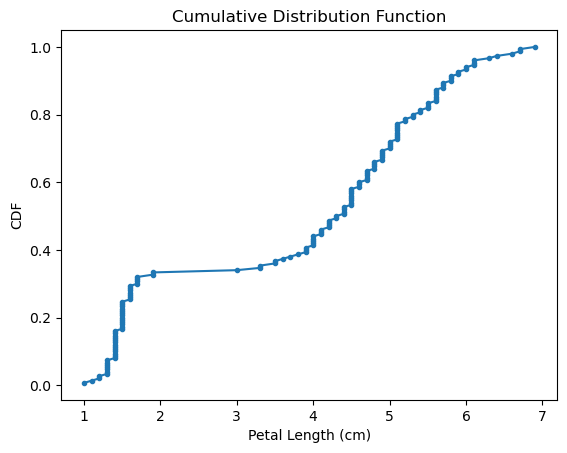

In [6]:
sorted_petal_length = np.sort(df['petal length (cm)'])
cdf = np.arange(1, len(sorted_petal_length)+1) / len(sorted_petal_length)

plt.plot(sorted_petal_length, cdf, marker='.')
plt.xlabel('Petal Length (cm)')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function')
plt.show()

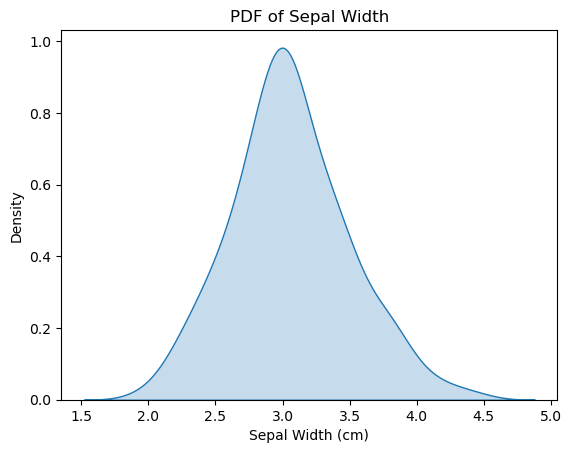

In [8]:
sns.kdeplot(df['sepal width (cm)'], fill=True)
plt.title('PDF of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.show()

In [9]:
threshold = 4.5
prob = (df['petal length (cm)'] > threshold).mean()
print(f"Probability that petal length > {threshold} cm: {prob}")

Probability that petal length > 4.5 cm: 0.42


In [10]:
setosa = df[df['species']=='setosa']['petal length (cm)']
versicolor = df[df['species']=='versicolor']['petal length (cm)']

t_stat, p_value = stats.ttest_ind(setosa, versicolor)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -39.492719391538095, P-value: 5.404910513441677e-62


In [11]:
covariance = np.cov(df['sepal length (cm)'], df['sepal width (cm)'])[0][1]
correlation = df['sepal length (cm)'].corr(df['sepal width (cm)'])

print(f"Covariance: {covariance}")
print(f"Correlation: {correlation}")

Covariance: -0.042434004474272924
Correlation: -0.11756978413300208
